<a href="https://colab.research.google.com/github/jdxxmahmud/mahdy-sir-re-acad-course/blob/main/Phase%201/Individual%20Assignments/Recorded%20Classes%20Notes/Deep%20Learning/Fully_Connected_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
# Sequential API to create models
from keras.models import Sequential

# Components to create a model
from keras.layers import Dense, Input

# Stochastic Gradient Descent Algorithm
from keras.optimizers import SGD

# Keras already hosted MSIST dataset for us
from keras.datasets import mnist

# An keras utility to binarize integers
from keras.utils import to_categorical

# An keras utility to visualize model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of its utilities
from skimage.io import imshow

# For plotting graphs
import matplotlib.pyplot as plt

# Another python library to manipulate vectors, matrices, arrays etc
import numpy as np


### Hyperparameters Parameters

In [2]:
batch_size = 128  # Batch size for training data
nb_classes = 10   # Number of classes in the classification problem, number of classes
nb_epoch = 10     # Number of times for training

### Load Data

In [3]:
# Load MNIST Dataset
# Data split into two sub-set training and test

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


### Data Statistics

In [4]:
print(f"Number of Training Samples: {len(X_train)}")
print(f"Number of Associated Labels: {len(y_train)}")

Number of Training Samples: 60000
Number of Associated Labels: 60000


In [5]:
print(f"Shape of Training Data: {X_train.shape}")


Shape of Training Data: (60000, 28, 28)


In [6]:
print(f"Data Type of Training Samples: {X_train.dtype}")


Data Type of Training Samples: uint8


In [7]:
print(f"Number of Test Samples: {len(X_test)}")
print(f"Number of Associated Labels: {len(y_test)}")


Number of Test Samples: 10000
Number of Associated Labels: 10000


In [8]:
print(f"Shape of Training Labels: {y_train.shape}")


Shape of Training Labels: (60000,)


In [9]:
print(f"Shape of Test Data: {X_test.shape}")


Shape of Test Data: (10000, 28, 28)


In [10]:
print(f"Shape of Test Label: {y_test.shape}")  # This is basically a column


Shape of Test Label: (10000,)


### Visualize Data

In [11]:
# A single sample among 60000 samples
X_train[0].shape

(28, 28)

In [12]:
a_random_sample = X_train[0]

# Pixel value of the sample
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

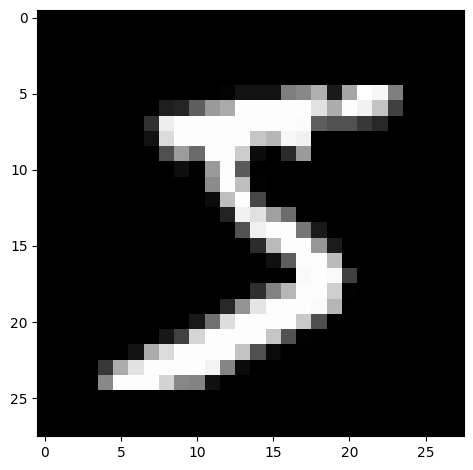

In [13]:
# Show as image

imshow(a_random_sample)

Plotting multiple images

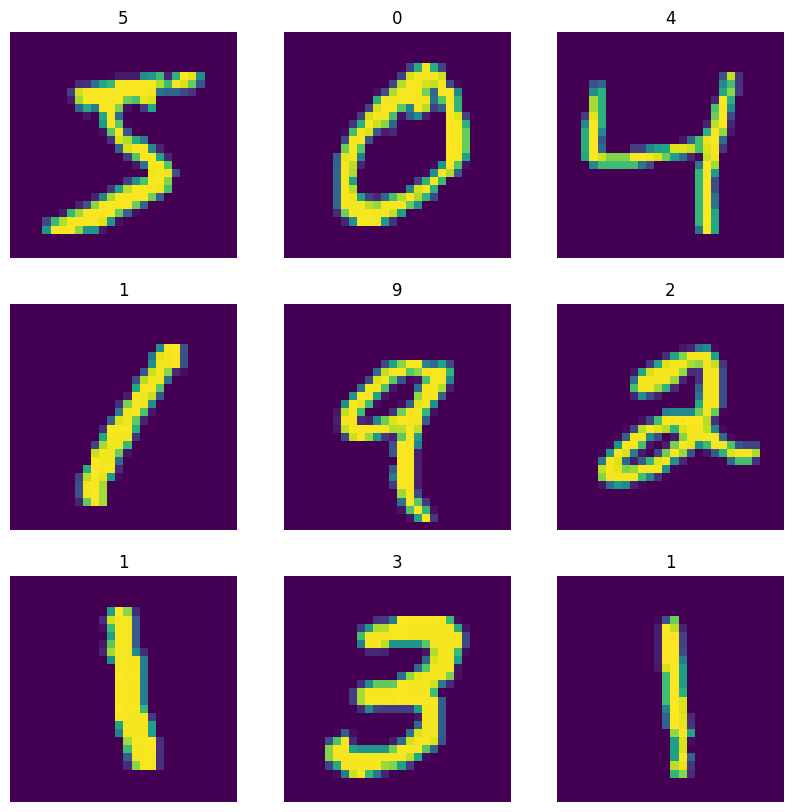

In [14]:
# Define the size of the figure
plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)

  # Get a sample at index i
  one_image = X_train[i]

  # Display the sample
  plt.imshow(one_image)

  # Display the label of the sample as titlt
  plt.title(int(y_train[i]))

  plt.axis("off")

### Reshape and Flatten Data

In [15]:
print("Shape of Training Data: ", X_train.shape)
print("Shape of Training Sample: ", X_train[0].shape)

Shape of Training Data:  (60000, 28, 28)
Shape of Training Sample:  (28, 28)


In [16]:
# Get a sample image
img = X_train[0]

print(f"Shape of a Sample Image: {img.shape}")

# Define new shape and flatten the image
new_shape = 28 * 28
flattened_img = img.reshape(new_shape, )
print(f"Shape of the flattened Image: {flattened_img.shape}")

Shape of a Sample Image: (28, 28)
Shape of the flattened Image: (784,)


In [17]:
print(f"Previous shape of X_train: {X_train.shape}")

# Flatten the whole training data
X_train = X_train.reshape(60000, 784)


print(f"New Shape of X_train: {X_train.shape}")

Previous shape of X_train: (60000, 28, 28)
New Shape of X_train: (60000, 784)


In [18]:
print(f"Previous shape of X_test: {X_test.shape}")

# Flatten the whole training data
X_test = X_test.reshape(10000, 784)


print(f"New Shape of X_test: {X_test.shape}")

Previous shape of X_test: (10000, 28, 28)
New Shape of X_test: (10000, 784)


Change datatype of Train and Test Data


In [19]:
print(f"Previous Data Types\n\tTrain Data: {X_train.dtype} \n\tTest Data: {X_test.dtype}")
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(f"New Data Types\n\tTrain Data: {X_train.dtype} \n\tTest Data: {X_test.dtype}")

Previous Data Types
	Train Data: uint8 
	Test Data: uint8
New Data Types
	Train Data: float32 
	Test Data: float32


### Rescaling Data

In [20]:
def print_min_max_val_of_sample(rand_sample):

  print(f"Min Value of sample: {rand_sample.min()}")
  print(f"Max Value of sample: {rand_sample.max()}")

In [21]:
print_min_max_val_of_sample(X_train[0])

Min Value of sample: 0.0
Max Value of sample: 255.0


Devide each value in Train and Test Data by 255

In [22]:
X_train /= 255
X_test /= 255

In [23]:
print_min_max_val_of_sample(X_train[0])


Min Value of sample: 0.0
Max Value of sample: 1.0


### Binarize Labels

Display training labels

In [24]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

This is basically a column. So following will be the shape

In [25]:
y_train.shape

(60000,)

### Array to categorial data

In [26]:
input_arr = np.array(range(10))
print(input_arr)
print(f"Input list shape: {input_arr.shape}")

output = to_categorical(input_arr, num_classes = 10)

print(output)
print(f"Output list shape: {output.shape}")

[0 1 2 3 4 5 6 7 8 9]
Input list shape: (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Output list shape: (10, 10)


Applying this to the training and test labels

In [27]:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

### Define Model

In [28]:
# Multilayer Perceptron Model

# We want to create a sequentially stacked model using keras Sequential API
model = Sequential()

# Setup input layer
model.add(Input(shape=(784, )))

# 1st Later in the model to receive inputs
model.add(Dense(784, activation = 'relu'))

# Hidden Layer
model.add(Dense(625, activation = 'relu'))

# Output Layer
model.add(Dense(10, activation = 'softmax'))   # Multiclass Classification, we use softmax

### Compile Model

In [29]:
# Choose Learning Rate
learning_rate = 0.001

# Select Optimizer
optimizer = SGD(learning_rate = learning_rate)

# Select loss function
loss = 'categorical_crossentropy'

# Select evaluation metrics
metrics = ['accuracy']

# Model compilation
model.compile(optimizer = optimizer, loss = loss, metrics=metrics)

### Visualize Model

In [30]:
# A summary of inputs, outputs in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 625)               490625    
                                                                 
 dense_2 (Dense)             (None, 10)                6260      
                                                                 
Total params: 1112325 (4.24 MB)
Trainable params: 1112325 (4.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Formula

$inputs * outputs + bias$ \\

Params in 1st layer: \\
$inputs = 784$ \\
$outputs = 784$ \\
$bias = 784$ \\
$Total Param = 784 * 784 + 784 = 615440$ \\

Params in Hidden layer: \\
$inputs = 784$ \\
$outputs = 625$ \\
$bias = 625$ \\
$Total Param = 784 * 625 + 625 = 490625$ \\

Params in Output layer: \\
$inputs = 625$ \\
$outputs = 10$ \\
$bias = 10$ \\
$Total Param = 625 * 10 + 10 = 6260$ \\

Total Trainable Params: \\
$615440+490625+6260 = 1112325$



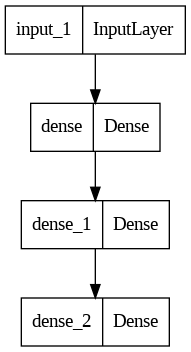

In [31]:
plot_model(model)

### Model Training

In [32]:
# Train
history = model.fit(X_train, Y_train, epochs = nb_epoch, batch_size = batch_size)

Epoch 1/10
469/469 [==============================] - 6s 7ms/step - loss: 2.1310 - accuracy: 0.3571
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 1.7476 - accuracy: 0.6821
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 1.3968 - accuracy: 0.7643
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 1.1176 - accuracy: 0.7993
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.9232 - accuracy: 0.8222
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7920 - accuracy: 0.8369
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7009 - accuracy: 0.8467
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6350 - accuracy: 0.8550
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5852 - accuracy: 0.8624
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5466 - accuracy: 0.8681

### Inference on Test Data

In [36]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test)

# Display test Statistics
print(f"Summary: \n\tLoss over the test dataset: {(evaluation[0] * 100):.2f}\n\t Accuracy: {(evaluation[1]* 100):.2f}")



313/313 [==============================] - 1s 4ms/step - loss: 0.5074 - accuracy: 0.8795
Summary: 
	Loss over the test dataset: 50.74
	 Accuracy: 87.95


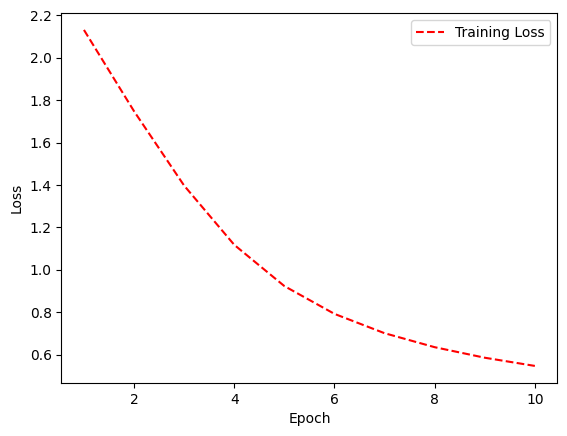

In [37]:
# Get training loss histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

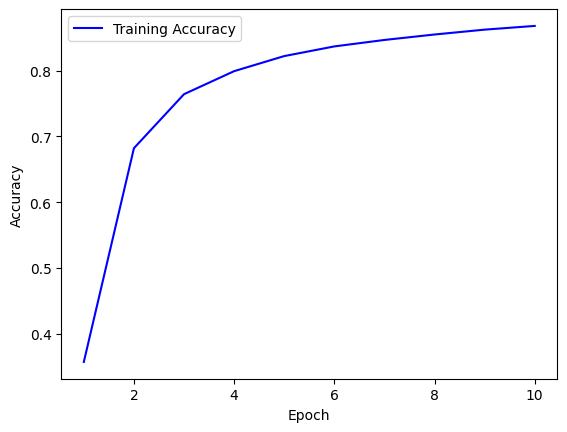

In [38]:
# Get training accuracy histories
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'b-')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();